# Breakdown of this notebook:
1. **Loading the dataset:** Load the data and import the libraries. <br>
2. **Data Cleaning:** <br>
 - Deleting redundant columns.
 - Renaming the columns.
 - Dropping duplicates.
 - Cleaning individual columns.
 - Remove the NaN values from the dataset
 - #Some Transformations

3. **Data Visualization:** Using plots to find relations between the features.
 - Restaurants delivering Online or not
 - Restaurants allowing table booking or not
 - Table booking Rate vs Rate
 - Best Location
 - Relation between Location and Rating
 - Restaurant Type
 - Gaussian Rest type and Rating
 - Types of Services
 - Relation between Type and Rating
 - Cost of Restuarant
 - No. of restaurants in a Location
 - Restaurant type
 - Most famous restaurant chains in Bengaluru 

<b>Download the dataset from <a href="https://drive.google.com/file/d/1Qe9B10KFvUJSVv_Kx31C-iYdDsTI-7Sz/view?usp=sharing">here</a></b>

#### The basic idea is analyzing the <font color=blue>Buisness Problem of Zomato </font> to get a fair idea about the factors affecting the establishment of different types of restaurant at different places in Bengaluru, aggregate rating of each restaurant and many more.

In [2]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#reading the dataset
zomato_real=pd.read_csv("zomato.csv")
zomato_real.head() # prints the first 5 rows of a DataFrame

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
# link of the hotel on zomato
zomato_real['url'][0]

'https://www.zomato.com/bangalore/jalsa-banashankari?context=eyJzZSI6eyJlIjpbNTg2OTQsIjE4Mzc1NDc0IiwiNTkwOTAiLCIxODM4Mjk0NCIsIjE4MjI0Njc2IiwiNTkyODkiLCIxODM3MzM4NiJdLCJ0IjoiUmVzdGF1cmFudHMgaW4gQmFuYXNoYW5rYXJpIHNlcnZpbmcgQnVmZmV0In19'

In [5]:
# review of one hotel
zomato_real['reviews_list'][0]

'[(\'Rated 4.0\', \'RATED\\n  A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.\'), (\'Rated 4.0\', \'RATED\\n  I was here for dinner with my family on a weekday. The restaurant was completely empty. Ambience is good with some good old hindi music. Seating arrangement are good too. We ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha. Food was fresh and good, service is good too. Good for family hangout.\\nCheers\'), (\'Rated 2.0\', \'RATED\\n  Its a restaurant near to Banashankari BDA. Me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet. On inquiring they said this plac

In [6]:
# listing all the unqiue values from the colmun 'listed_in(type)' which represents types of hotels
zomato_real['listed_in(type)'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [7]:
zomato_real.isnull()   # or zomato_real.isna()     # zomato_real.isna().sum()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
51713,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False
51714,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False
51715,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
# Looking at the information about the dataset, datatypes of the coresponding columns and missing values
zomato_real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [9]:
# finding the datatypes of all the columns
zomato_real.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [7]:
# finding total missing values present in each columns
zomato_real.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [5]:
#Deleting Unnnecessary Columns
zomato=zomato_real.drop(['url','dish_liked','phone'],axis=1)
#Dropping the column "dish_liked", "phone", "url" and saving the new dataset as "zomato"

-  “axis 0” represents rows
- "axis 1” represents columns

In [6]:
zomato.head() # looking at the dataset after transformation 

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [7]:
# total duplicates
zomato.duplicated().sum()

43

In [8]:
#Removing the Duplicates
zomato.drop_duplicates(inplace=True)
# When inplace = True , the data is modified in place, 
# which means it will return nothing and the dataframe is now updated
# also you can use above line of code as given below
# zomato = zomato.drop_duplicates()


zomato.head() # looking at the dataset after transformation

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [9]:
# find total null values
zomato.isnull().sum()

address                           0
name                              0
online_order                      0
book_table                        0
rate                           7767
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     345
reviews_list                      0
menu_item                         0
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

### dropna(how, inplace)
####  Determine if row or column is removed from DataFrame, when we have at least one NA or all NA.

- ‘any’ : If any NA values are present, drop that row or column.

- ‘all’ : If all values are NA, drop that row or column.

In [10]:
#Remove the NaN values from the dataset, here NaN refers to the null value
zomato.dropna(how='any',inplace=True)
zomato.info() #.info() function is used to get a concise summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      43499 non-null  object
 1   name                         43499 non-null  object
 2   online_order                 43499 non-null  object
 3   book_table                   43499 non-null  object
 4   rate                         43499 non-null  object
 5   votes                        43499 non-null  int64 
 6   location                     43499 non-null  object
 7   rest_type                    43499 non-null  object
 8   cuisines                     43499 non-null  object
 9   approx_cost(for two people)  43499 non-null  object
 10  reviews_list                 43499 non-null  object
 11  menu_item                    43499 non-null  object
 12  listed_in(type)              43499 non-null  object
 13  listed_in(city)              43

In [11]:
#Reading Column Names
zomato.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [12]:
#Changing the column names
zomato = zomato.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type',
                                  'listed_in(city)':'city'})
zomato.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

### Pandas - df.apply()
#### df refers to dataframe
- allow the users to pass a function and apply it on every single value of the Pandas series. 
- this function helps to segregate data according to the conditions

In [13]:
#Some Transformations

#Changing the cost to string
zomato['cost'] = zomato['cost'].astype(str) 

#Using lambda function to replace ',' from cost
zomato['cost'] = zomato['cost'].apply(lambda x: x.replace(',','.'))    # replacing ',' with '.'
zomato['cost'] = zomato['cost'].astype(float) # Changing the cost to Float
zomato.info() # looking at the dataset information after transformation

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       43499 non-null  object 
 1   name          43499 non-null  object 
 2   online_order  43499 non-null  object 
 3   book_table    43499 non-null  object 
 4   rate          43499 non-null  object 
 5   votes         43499 non-null  int64  
 6   location      43499 non-null  object 
 7   rest_type     43499 non-null  object 
 8   cuisines      43499 non-null  object 
 9   cost          43499 non-null  float64
 10  reviews_list  43499 non-null  object 
 11  menu_item     43499 non-null  object 
 12  type          43499 non-null  object 
 13  city          43499 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 5.0+ MB


In [14]:
#Reading uninque values from the Rate column
zomato['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [23]:
# remove unwanted values ex: 'NEW'
zomato = zomato.loc[zomato.rate !='NEW']     # or     zomato.loc[zomato['rate'] !='NEW']

In [24]:
zomato['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5', '4.5/5',
       '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5', '3.4 /5',
       '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5',
       '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5', '3.5 /5',
       '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5', '4.3 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5', '4.9 /5',
       '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5', '2.1 /5',
       '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [29]:
# checking basic info of the dtafram
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41237 entries, 0 to 41236
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       41237 non-null  object 
 1   name          41237 non-null  object 
 2   online_order  41237 non-null  object 
 3   book_table    41237 non-null  object 
 4   rate          41237 non-null  float64
 5   votes         41237 non-null  int64  
 6   location      41237 non-null  object 
 7   rest_type     41237 non-null  object 
 8   cuisines      41237 non-null  object 
 9   cost          41237 non-null  float64
 10  reviews_list  41237 non-null  object 
 11  menu_item     41237 non-null  object 
 12  type          41237 non-null  object 
 13  city          41237 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 4.4+ MB


### reset_index() - pandas
- Pandas reset_index() is a method to reset index of a Data Frame. 
- reset_index() method sets a list of integer ranging from 0 to length of data as index. 

### strip() 
- method removes any leading (spaces at the beginning) and trailing (spaces at the end) characters (space is the default leading character to remove)

In [28]:
#Removing '/5' from Rates
# zomato = zomato.loc[zomato.rate !='NEW']
zomato = zomato.loc[zomato.rate !='-'].reset_index(drop=True)
remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x
zomato.rate = zomato.rate.apply(remove_slash).str.strip().astype('float')

zomato['rate'].head() # looking at the dataset after transformation

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

### title() 
- returns a string where the first character in every word is upper case. Like a header, or a title. 
- If the word contains a number or a symbol, the first letter after that will be converted to upper case.

In [32]:
# Adjust the column names
zomato.name = zomato.name.apply(lambda x:x.title())
zomato.online_order.replace(('Yes','No'),(True, False),inplace=True)
zomato.book_table.replace(('Yes','No'),(True, False),inplace=True)
zomato.head() # looking at the dataset after transformation


,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,True,False,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,False,False,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,False,False,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [33]:
zomato.cost.unique() # cheking the unique costs

array([800.  , 300.  , 600.  , 700.  , 550.  , 500.  , 450.  , 650.  ,
       400.  , 900.  , 200.  , 750.  , 150.  , 850.  , 100.  ,   1.2 ,
       350.  , 250.  , 950.  ,   1.  ,   1.5 ,   1.3 , 199.  ,   1.1 ,
         1.6 , 230.  , 130.  ,   1.7 ,   1.35,   2.2 ,   1.4 ,   2.  ,
         1.8 ,   1.9 , 180.  , 330.  ,   2.5 ,   2.1 ,   3.  ,   2.8 ,
         3.4 ,  50.  ,  40.  ,   1.25,   3.5 ,   4.  ,   2.4 ,   2.6 ,
         1.45,  70.  ,   3.2 , 240.  ,   6.  ,   1.05,   2.3 ,   4.1 ,
       120.  ,   5.  ,   3.7 ,   1.65,   2.7 ,   4.5 ,  80.  ])

### Encoding
- Integer Encoding: Where each unique label is mapped to an integer.
- One Hot Encoding: Where each label is mapped to a binary vector.

## refer below youtube link for understanding the ENCODING concepts
## <a href="https://www.youtube.com/watch?v=OTPz5plKb40">Theory https://www.youtube.com/watch?v=OTPz5plKb40</a>
## <a href="https://www.youtube.com/watch?v=6WDFfaYtN6s">Theory https://www.youtube.com/watch?v=6WDFfaYtN6s</a>


## Alse make sure you know the ONE HOT ENCODING & ORDINAL/Integer Enccoding from the above Youtube link, these two are important and will be used again and again


## Note:
## I have created my own function for encoding, but above & below links will help you the same with the inbuilt functions

## <a href="https://rhuanca.medium.com/top-10-one-hot-encoding-con-apache-spark-fa23074c91d">https://rhuanca.medium.com/top-10-one-hot-encoding-con-apache-spark-fa23074c91d</a>



In [40]:
zomato['rate'].factorize()

(array([ 0,  0,  1, ...,  3, 14, 18]),
 Float64Index([4.1, 3.8, 3.7, 3.6, 4.6, 4.0, 4.2, 3.9, 3.1, 3.0, 3.2, 3.3, 2.8,
               4.4, 4.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2, 2.3,
               4.8, 4.9, 2.1, 2.0, 1.8],
              dtype='float64'))

In [41]:
# Encode the input Variables
def Encode(zomato):
    for column in zomato.columns[~zomato.columns.isin(['rate', 'cost', 'votes'])]:
        # factorize() will convert the distinct values in different numerical categories
        zomato[column] = zomato[column].factorize()[0]
    return zomato

zomato_en = Encode(zomato.copy())  # copy() will reflectthe changes at both the places
zomato_en.head() # looking at the dataset after transformation

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,0,0,0,0,4.1,775,0,0,0,800.0,0,0,0,0
1,1,1,0,1,4.1,787,0,0,1,800.0,1,0,0,0
2,2,2,0,1,3.8,918,0,1,2,800.0,2,0,0,0
3,3,3,1,1,3.7,88,0,2,3,300.0,3,0,0,0
4,4,4,1,1,3.8,166,1,0,4,600.0,4,0,0,0


### Correlation means an association, It is a measure of the extent to which two variables are related. 
- Sources: <a href="https://www.geeksforgeeks.org/plotting-correlation-matrix-using-python/">Geeks for geeks</a>

### 1. Positive Correlation: 
- When two variables increase together and decrease together. They are positively correlated. 
- ‘1’ is a perfect positive correlation. 
    - For example – demand and profit are positively correlated the more the demand for the product, the more profit hence positive correlation.
    
### 2. Negative Correlation: 
- When one variable increases and the other variable decreases together and vice-versa. 
- They are negatively correlated. 
    - For example, If the distance between magnet increases their attraction decreases, and vice-versa. 
    - Hence, a negative correlation. ‘-1’  is no correlation
    
### 3. Zero Correlation( No Correlation): 
- When two variables don’t seem to be linked at all. 
- ‘0’ is a perfect negative correlation. 
    - For Example, the amount of tea you take and level of intelligence.

In [52]:
# correlation without graph
zomato_en.corr()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
address,1.000000,0.682346,0.165707,0.021447,-0.036195,-0.010738,0.614626,0.030634,0.238421,0.003227,0.512074,0.058929,0.094137,0.423011
name,0.682346,1.000000,0.231616,-0.033718,-0.046936,-0.043871,0.448705,0.036212,0.301793,-0.084328,0.339130,-0.031798,0.116000,0.307128
online_order,0.165707,0.231616,1.000000,-0.054894,-0.069042,0.013278,0.048645,0.136741,0.049921,-0.180782,0.051440,-0.362114,0.239236,0.054354
book_table,0.021447,-0.033718,-0.054894,1.000000,-0.426027,-0.393270,-0.032781,-0.226763,-0.225396,0.266651,-0.132809,0.040496,-0.114302,-0.028847
rate,-0.036195,-0.046936,-0.069042,-0.426027,1.000000,0.435237,0.030363,0.196933,0.189624,-0.115346,0.159661,0.054942,0.034038,0.023908
votes,-0.010738,-0.043871,0.013278,-0.393270,0.435237,1.000000,0.006847,0.221805,0.158714,-0.116118,0.140364,-0.000754,0.070373,0.026348
location,0.614626,0.448705,0.048645,-0.032781,0.030363,0.006847,1.000000,0.046133,0.178518,-0.020351,0.407854,0.089058,0.040451,0.361957
rest_type,0.030634,0.036212,0.136741,-0.226763,0.196933,0.221805,0.046133,1.000000,0.158553,-0.287720,0.085501,-0.023399,0.147835,0.047756
cuisines,0.238421,0.301793,0.049921,-0.225396,0.189624,0.158714,0.178518,0.158553,1.000000,-0.044700,0.196259,0.026915,0.083311,0.141997
cost,0.003227,-0.084328,-0.180782,0.266651,-0.115346,-0.116118,-0.020351,-0.287720,-0.044700,1.000000,-0.007775,0.073016,-0.156012,-0.026472


Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

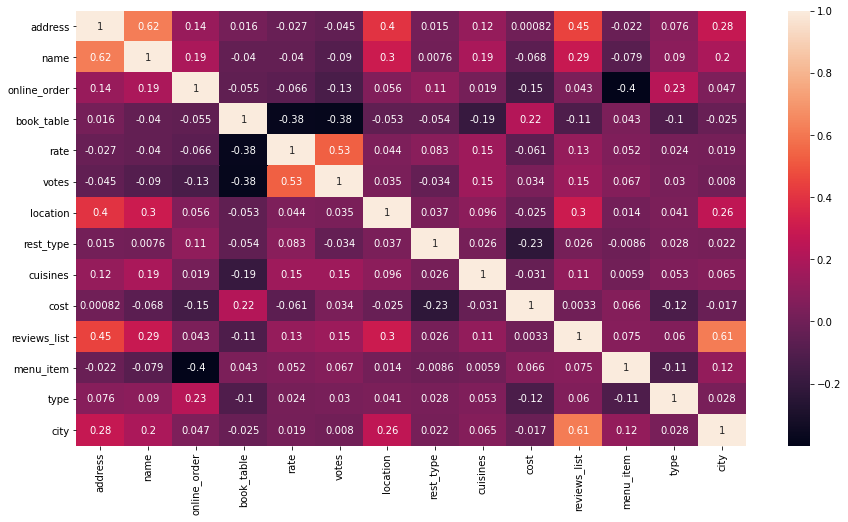

In [59]:
#Get Correlation between different variables
corr = zomato_en.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
zomato_en.columns

#### The highest correlation is between name and address which is 0.62 which is not of very much concern 

# Data Visualization

#### Restaurants delivering Online or not

Text(0.5, 1.0, 'Restaurants delivering online or Not')

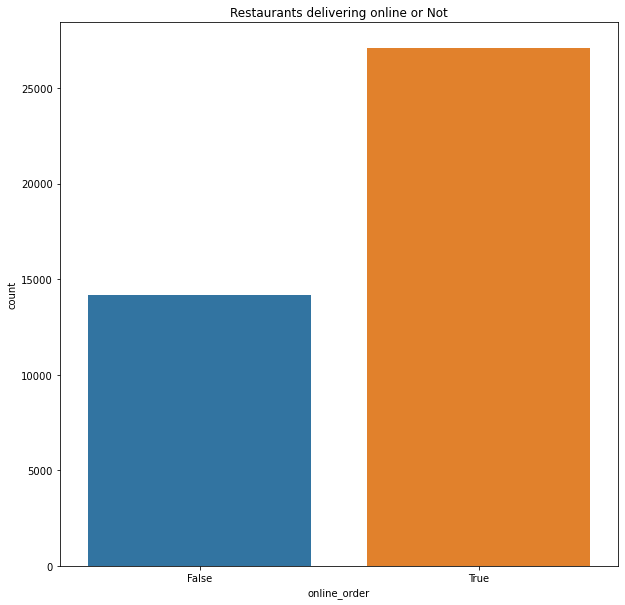

In [64]:
#Restaurants delivering Online or not
sns.countplot(zomato['online_order'])

# matplotlib.pyplot.gcf() is primarily used to get the current figure. 
# If no current figure is available then one is created with the help of the figure() function.
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Restaurants delivering online or Not')

Text(0.5, 1.0, 'Restaurants delivering online or Not')

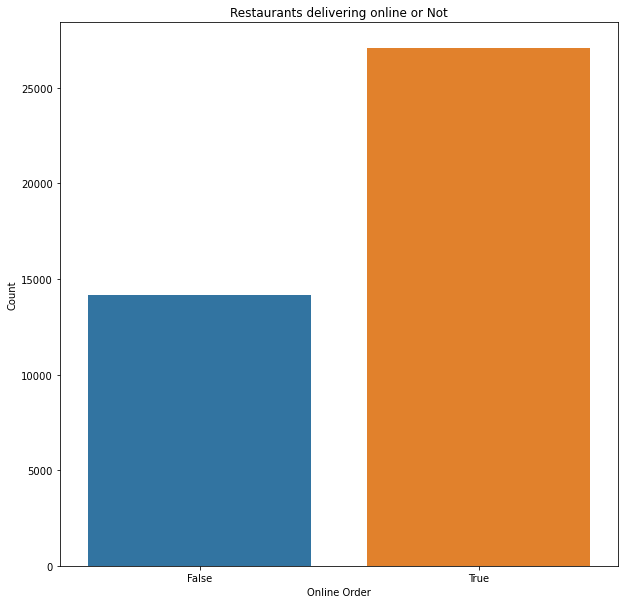

In [66]:
#Restaurants delivering Online or not
ax=sns.countplot(zomato['online_order'])

# matplotlib.pyplot.gcf() is primarily used to get the current figure. 
# If no current figure is available then one is created with the help of the figure() function.
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set(xlabel='Online Order', ylabel='Count')
plt.title('Restaurants delivering online or Not')

#### Restaurants allowing table booking or not

Text(0.5, 1.0, 'Restaurants allowing table booking or not')

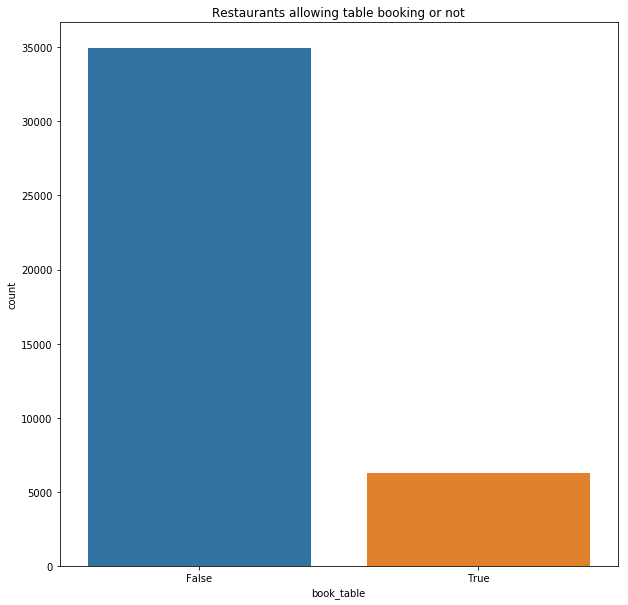

In [34]:
sns.countplot(zomato['book_table'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Restaurants allowing table booking or not')

#### Table booking Rate vs Normal Rate

- rcParams
    - Each time Matplotlib loads, it defines a runtime configuration (rc) containing the default styles for every plot element you create. 
    - This configuration can be adjusted at any time using the plt. ... matplotlibrc file

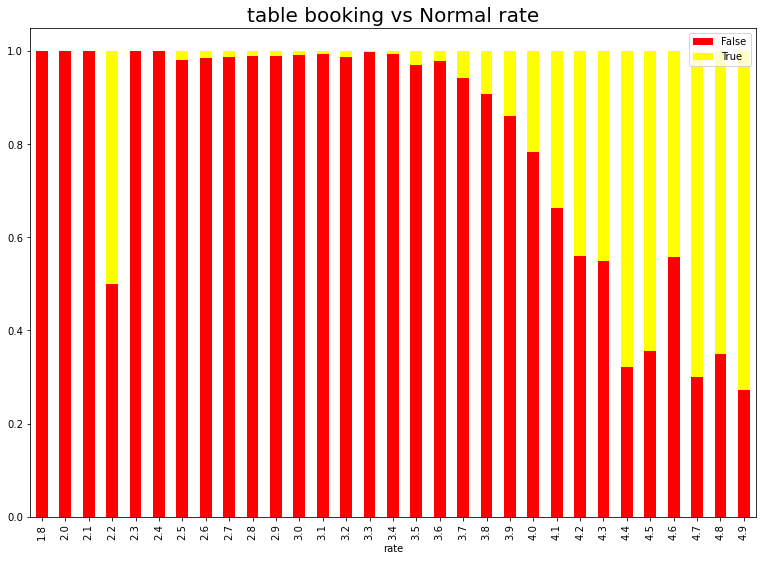

In [85]:
plt.rcParams['figure.figsize'] = (13, 9)
# crosstab - Compute a simple cross tabulation of two (or more) factors.
Y = pd.crosstab(zomato['rate'], zomato['book_table'])

# Pandas dataframe.div() is used to find the floating division of the dataframe. ex: ip - 5.4 & op - 2.7
Y.div(Y.sum(axis=1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,color=['red','yellow'])
plt.title('table booking vs Normal rate', fontweight = 30, fontsize = 20)
# legend() A legend is an area describing the elements of the graph., ex: place color label at position
plt.legend(loc="upper right")
plt.show()

#### Location

Text(0.5, 1.0, 'Location wise count for restaurants')

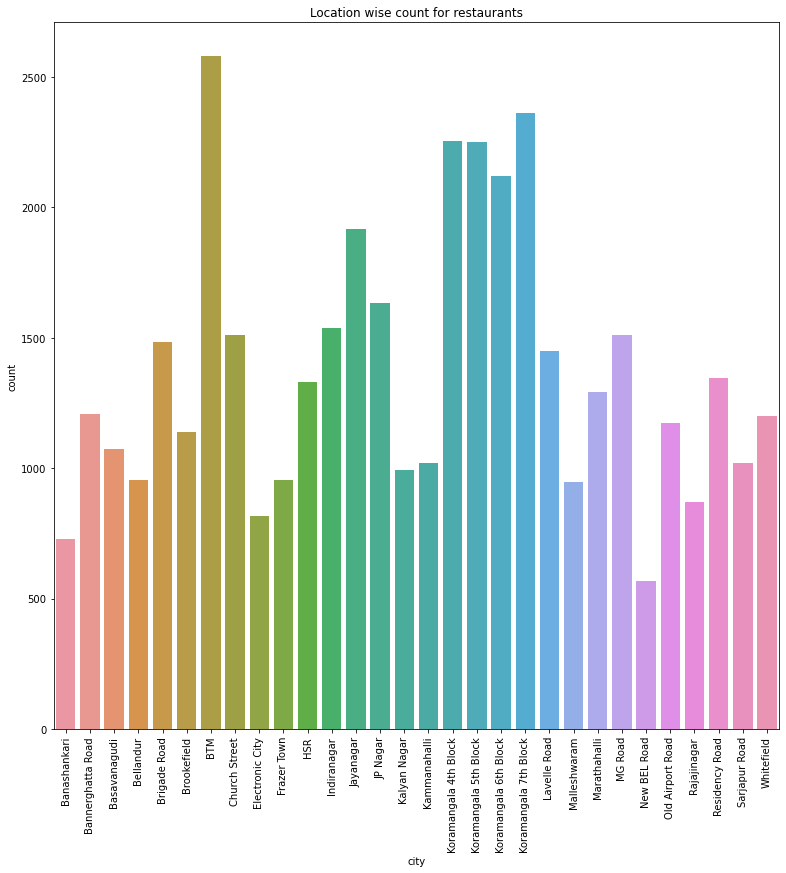

In [92]:
sns.countplot(zomato['city'])
sns.countplot(zomato['city']).set_xticklabels(sns.countplot(zomato['city']).get_xticklabels(), rotation=90)
# get current fighure
fig = plt.gcf()
fig.set_size_inches(13,13)
# plt.xlabel('City')
# plt.ylabel('Count')
plt.title('Location wise count for restaurants')

#### Location and Rating

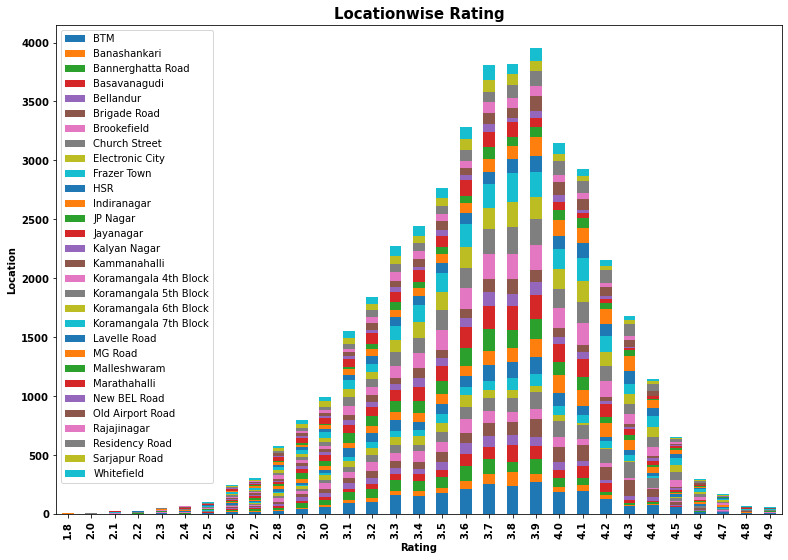

In [93]:
loc_plt=pd.crosstab(zomato['rate'],zomato['city'])
loc_plt.plot(kind='bar',stacked=True);
plt.title('Locationwise Rating',fontsize=15,fontweight='bold')
plt.ylabel('Location',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');
# legend() A legend is an area describing the elements of the graph., ex: place color label at position
plt.legend();

#### Restaurant Type

Text(0.5, 1.0, 'Restuarant Type')

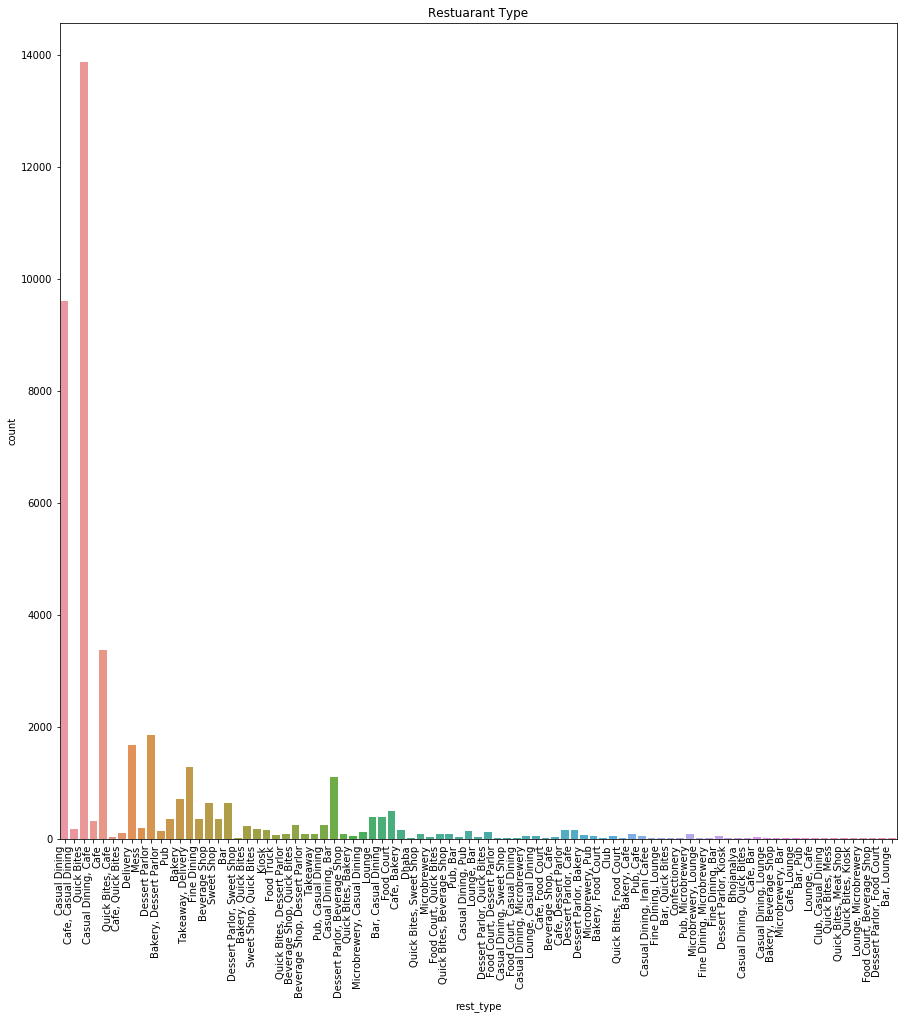

In [41]:
sns.countplot(zomato['rest_type'])
sns.countplot(zomato['rest_type']).set_xticklabels(sns.countplot(zomato['rest_type']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('Restuarant Type')

#### Gaussian Rest type and Rating

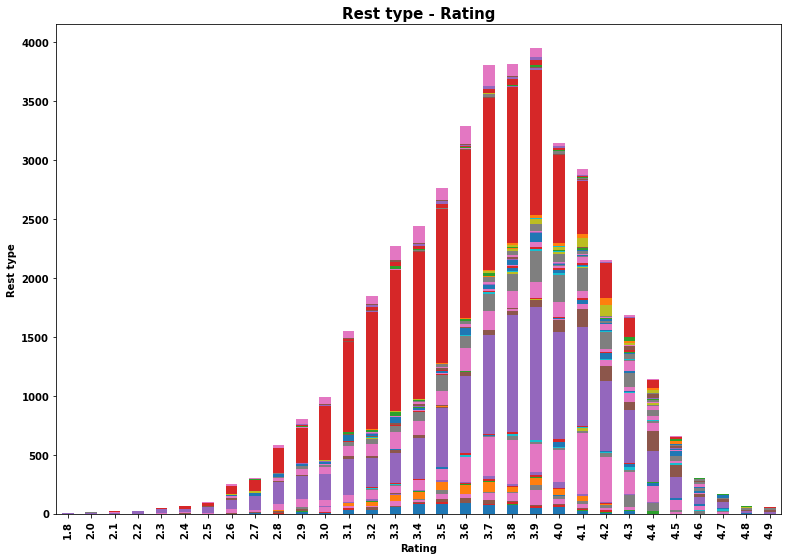

In [42]:
loc_plt=pd.crosstab(zomato['rate'],zomato['rest_type'])
loc_plt.plot(kind='bar',stacked=True);
plt.title('Rest type - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Rest type',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');
plt.legend().remove();

#### Types of Services

Text(0.5, 1.0, 'Type of Service')

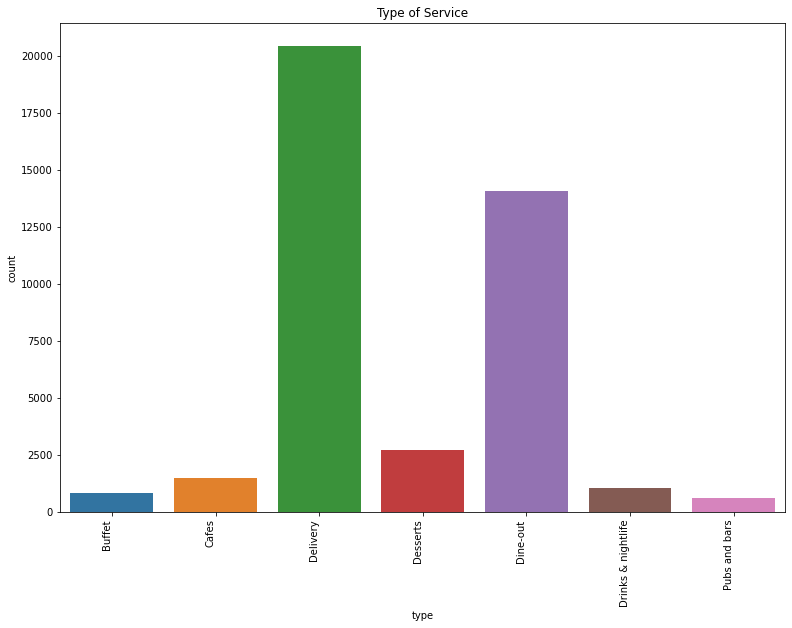

In [94]:
sns.countplot(zomato['type'])
sns.countplot(zomato['type']).set_xticklabels(sns.countplot(zomato['type']).get_xticklabels(), rotation=90, ha="right")
# fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('Type of Service')

#### Type and Rating

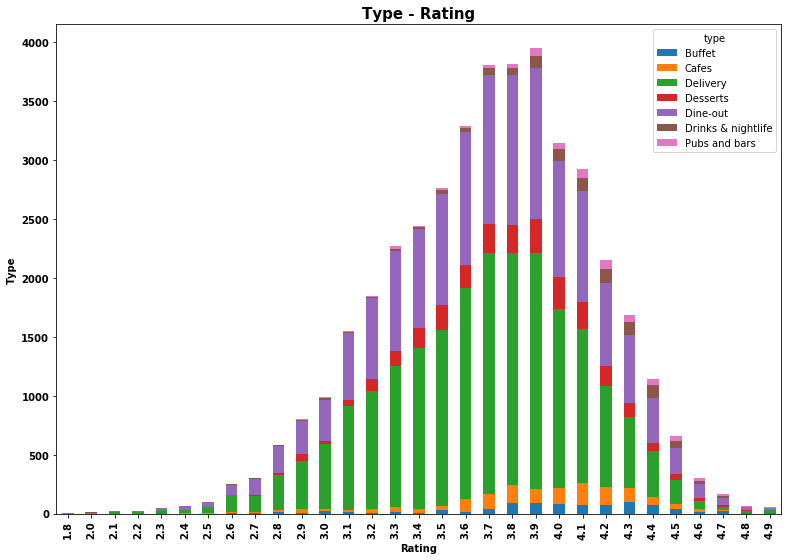

In [45]:
type_plt=pd.crosstab(zomato['rate'],zomato['type'])
type_plt.plot(kind='bar',stacked=True);
plt.title('Type - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Type',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');

#### Cost of Restuarant

Text(0.5, 1.0, 'Cost of Restuarant')

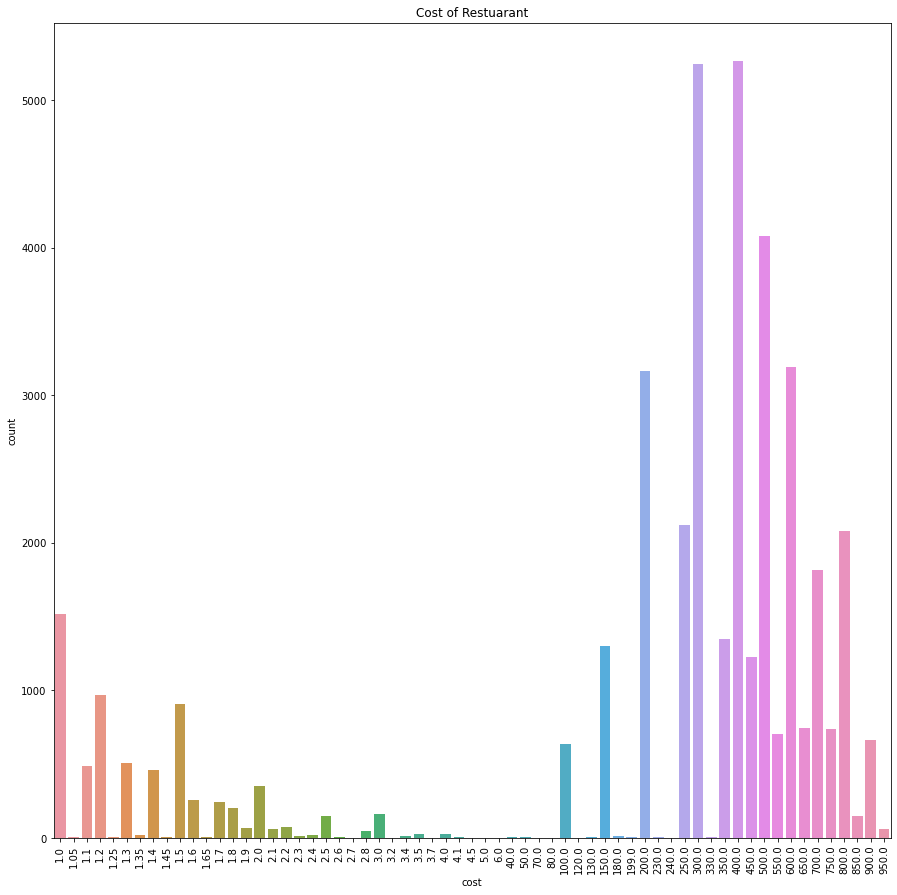

In [97]:
sns.countplot(zomato['cost'])
sns.countplot(zomato['cost']).set_xticklabels(sns.countplot(zomato['cost']).get_xticklabels(), rotation=90)
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('Cost of Restuarant')

#### No. of Restaurants in a Location

Text(0.5, 1.0, 'NO. of restaurants in a Location')

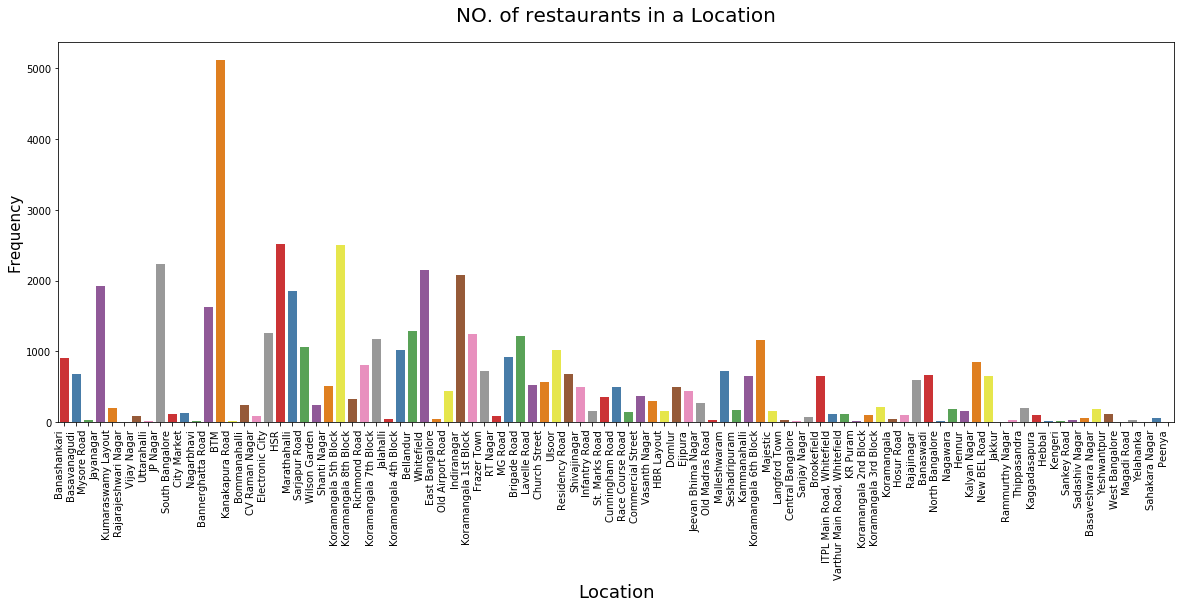

In [46]:
fig = plt.figure(figsize=(20,7))
loc = sns.countplot(x="location",data=zomato_real, palette = "Set1")
loc.set_xticklabels(loc.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("Location",size=18)
loc
plt.title('NO. of restaurants in a Location',size = 20,pad=20)

#### Restaurant type

Text(0.5, 1.0, 'Restaurant types')

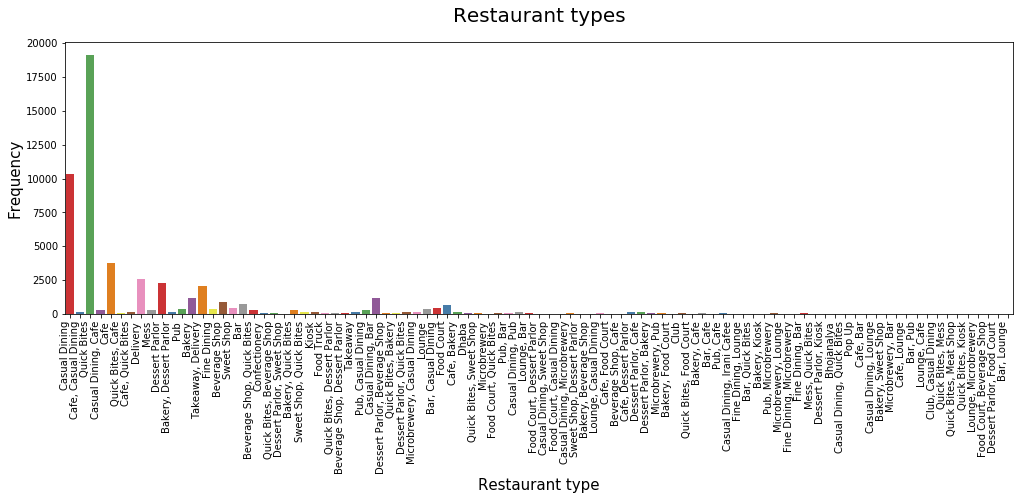

In [47]:
fig = plt.figure(figsize=(17,5))
rest = sns.countplot(x="rest_type",data=zomato_real, palette = "Set1")
rest.set_xticklabels(rest.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("Restaurant type",size=15)
rest 
plt.title('Restaurant types',fontsize = 20 ,pad=20)

#### Most famous Restaurant chains in Bengaluru

- value_counts()
    - function returns object containing counts of unique values`

Text(0.5, 0, 'Number of outlets')

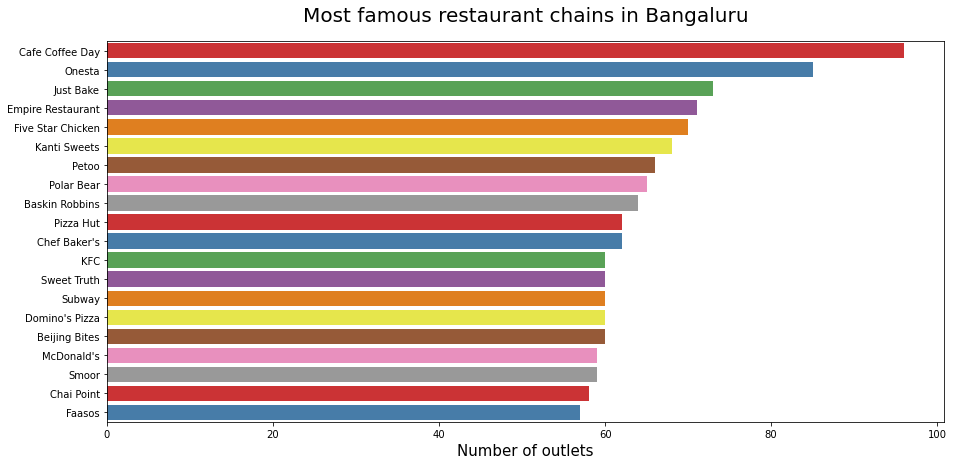

In [100]:
plt.figure(figsize=(15,7))
chains=zomato_real['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='Set1')  # palette='Set2'
plt.title("Most famous restaurant chains in Bangaluru",size=20,pad=20)
plt.xlabel("Number of outlets",size=15)

# KAGGLE

## <a href="https://www.youtube.com/watch?v=e_4NJCjAJFE">https://www.youtube.com/watch?v=e_4NJCjAJFE</a>

- Refer above video for understanding proper use of kaggle

- If you have not finished stats and ML class than just ingore it for now if you come across anywhere for now later it will get clear once you finish that